# Histogram 1D
## This histogram class allows efficient updating of histograms, plotting and saving as HDF5

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import h5py
from geobipy import hdfRead
from geobipy import StatArray
from geobipy import Histogram1D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Histogram with regular bins

In [2]:
x = np.random.randn(1000)
bins = StatArray(np.linspace(-4, 4, 101), 'Regular bins')

### Set the histogram using the bins, and update

In [3]:
H = Histogram1D(bins = bins)
H.update(x)

<IPython.core.display.Javascript object>


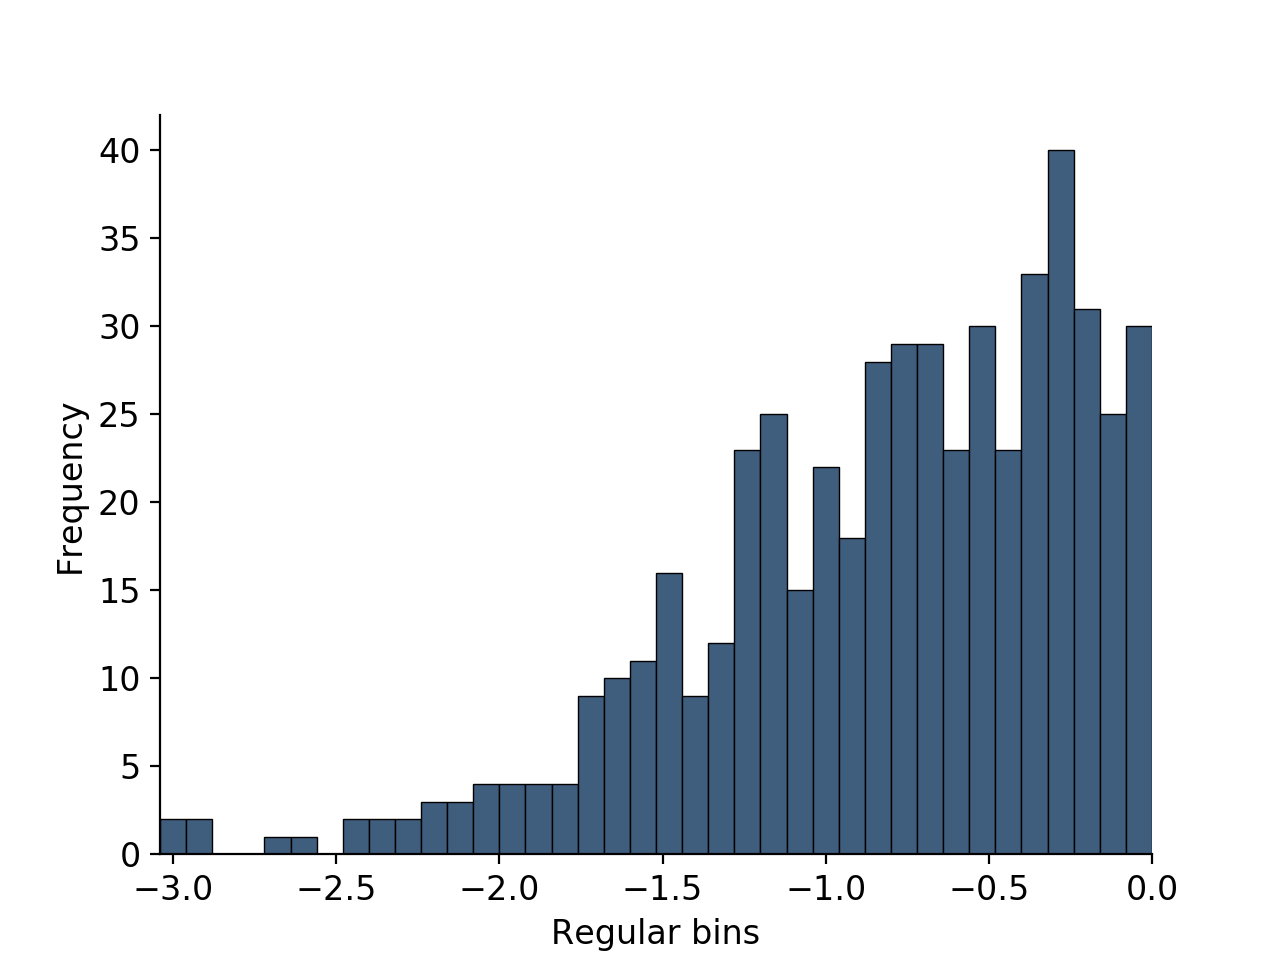

### Plot the histogram

<IPython.core.display.Javascript object>


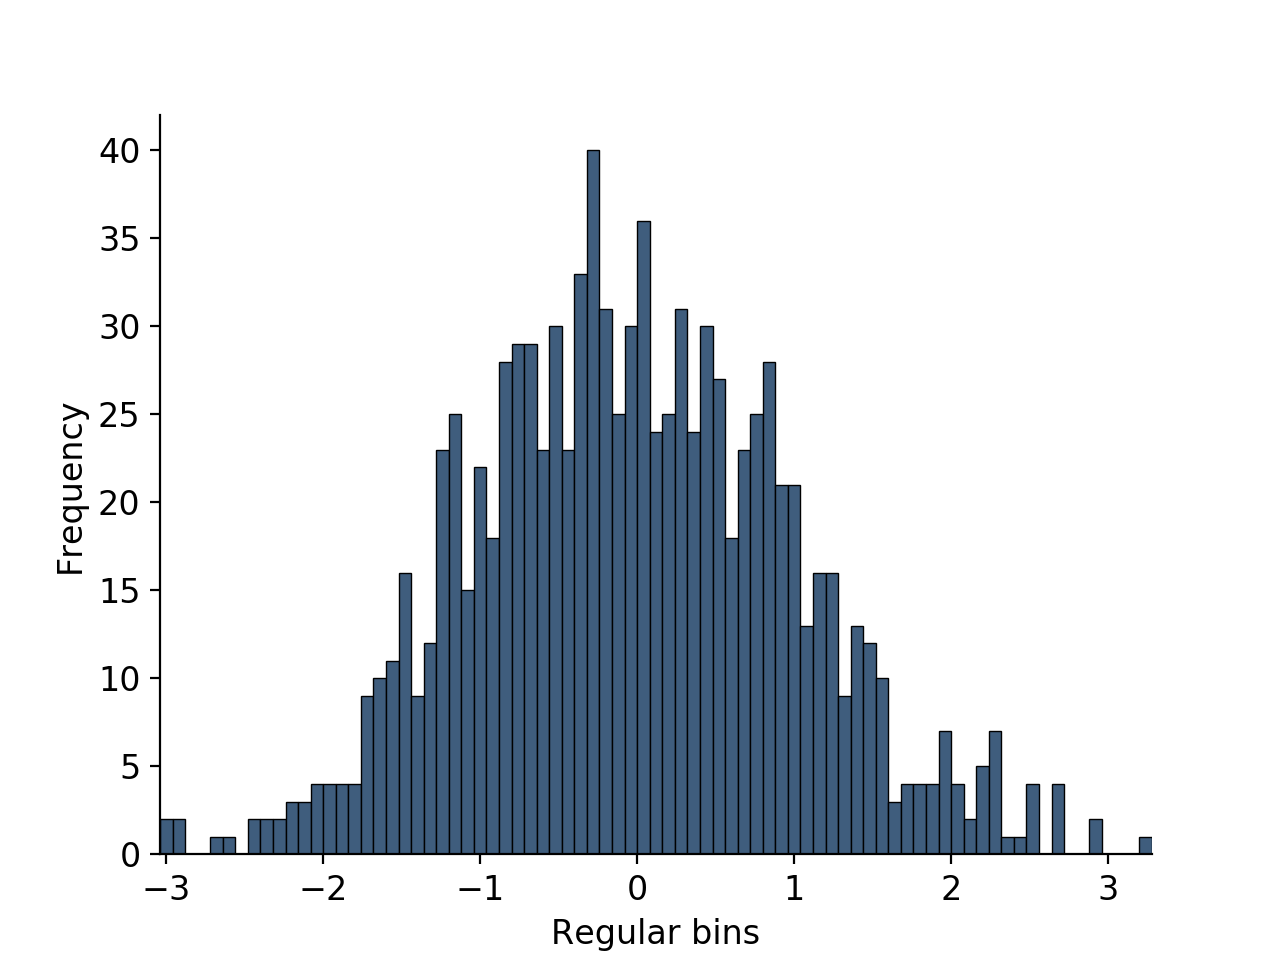

In [15]:
plt.figure()
H.plot()

<IPython.core.display.Javascript object>


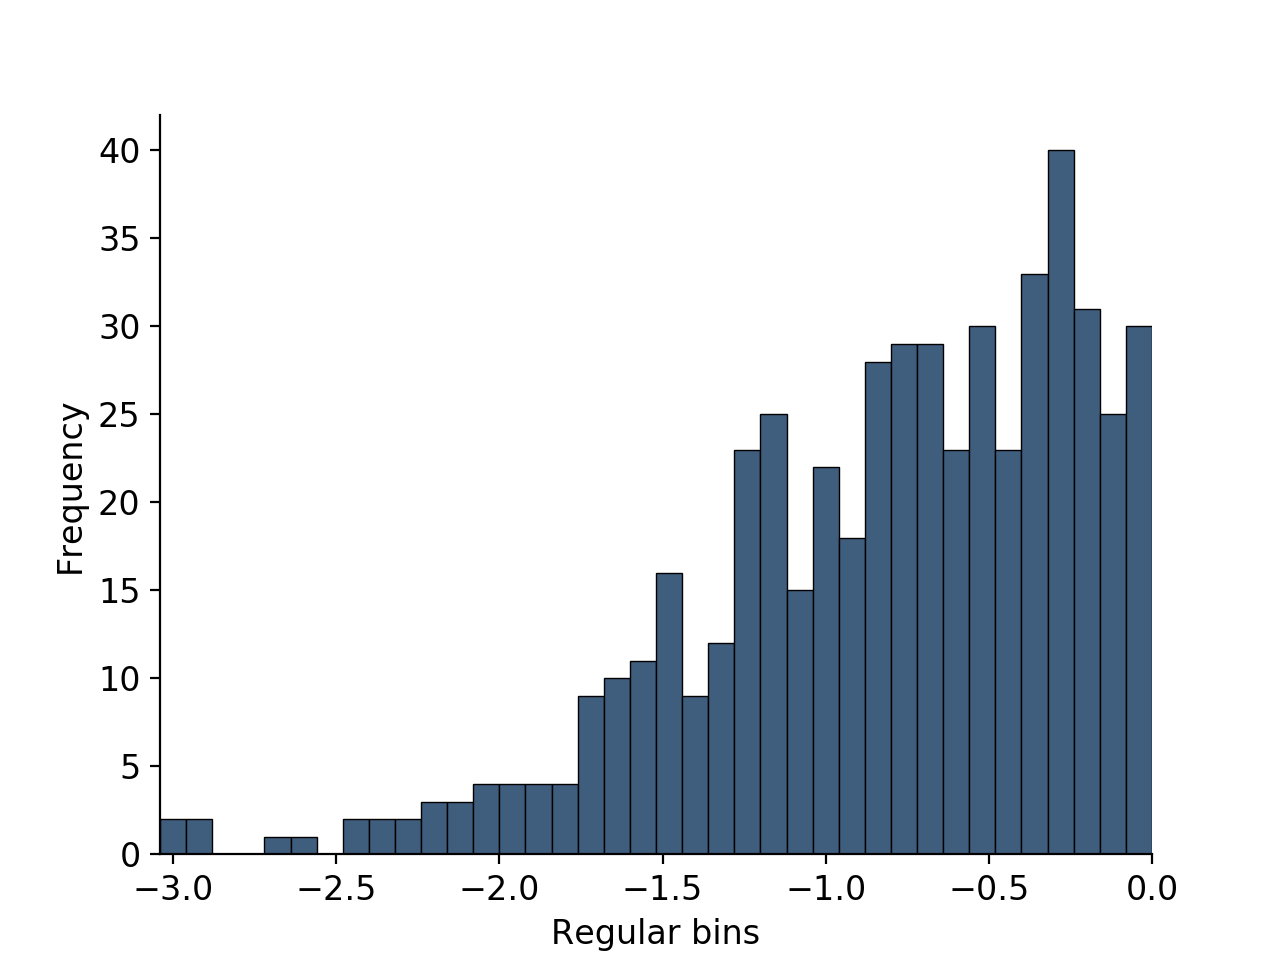

In [16]:
plt.figure()
H[:50].plot()

If the keyword argument "trim" is false, any outliers will land in the outermost bins

In [22]:
x = np.full(100, 1000.0)
H.update(x)

<IPython.core.display.Javascript object>


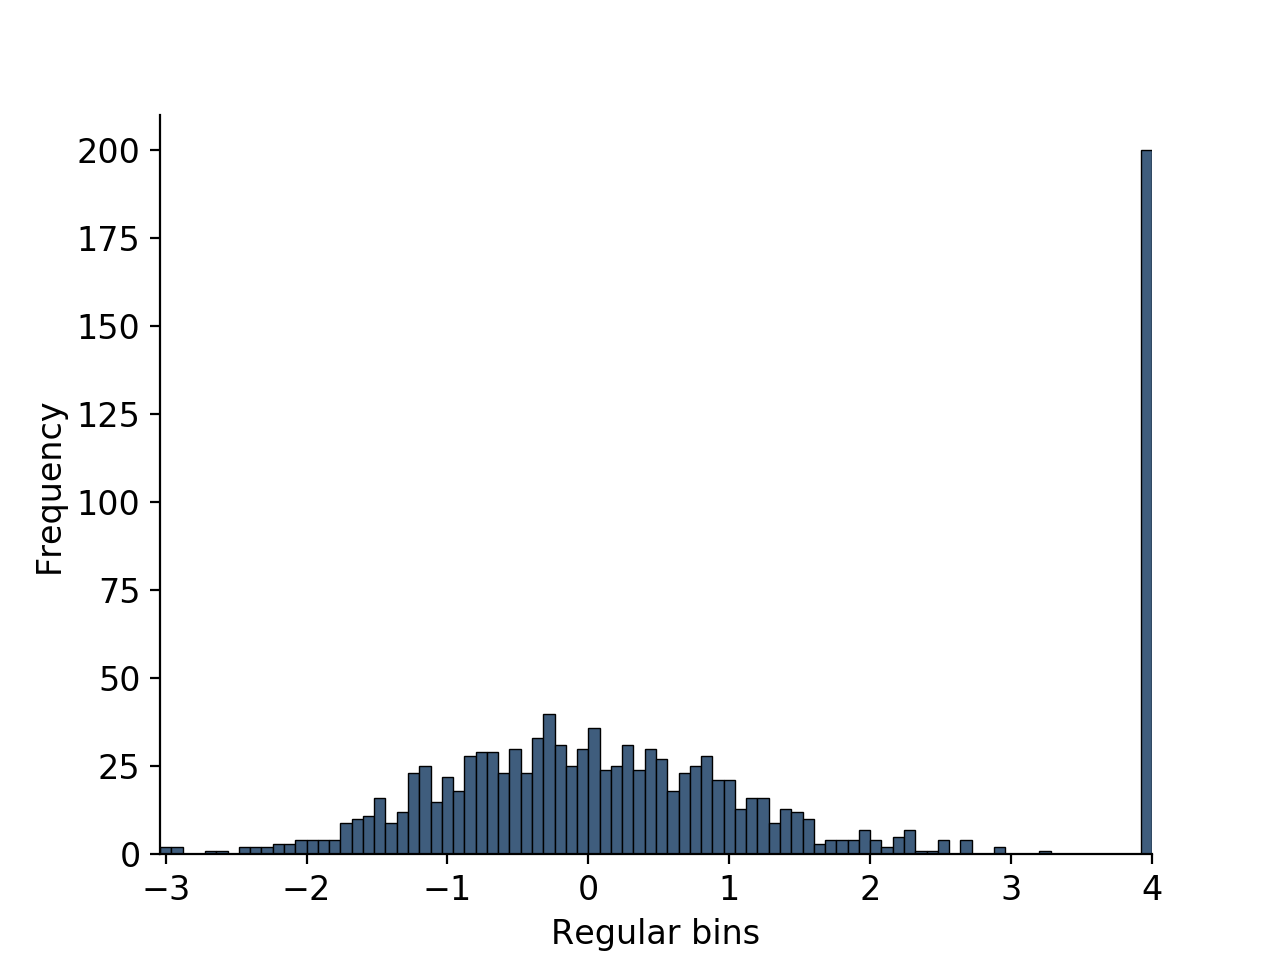

In [23]:
plt.figure()
H.plot()

### We can write/read the histogram to/from a HDF file

In [24]:
with h5py.File('Histogram.h5','w') as hf:
    H.toHdf(hf,'Histogram')

In [25]:
H1 = hdfRead.readKeyFromFiles('Histogram.h5','/','Histogram')

<IPython.core.display.Javascript object>


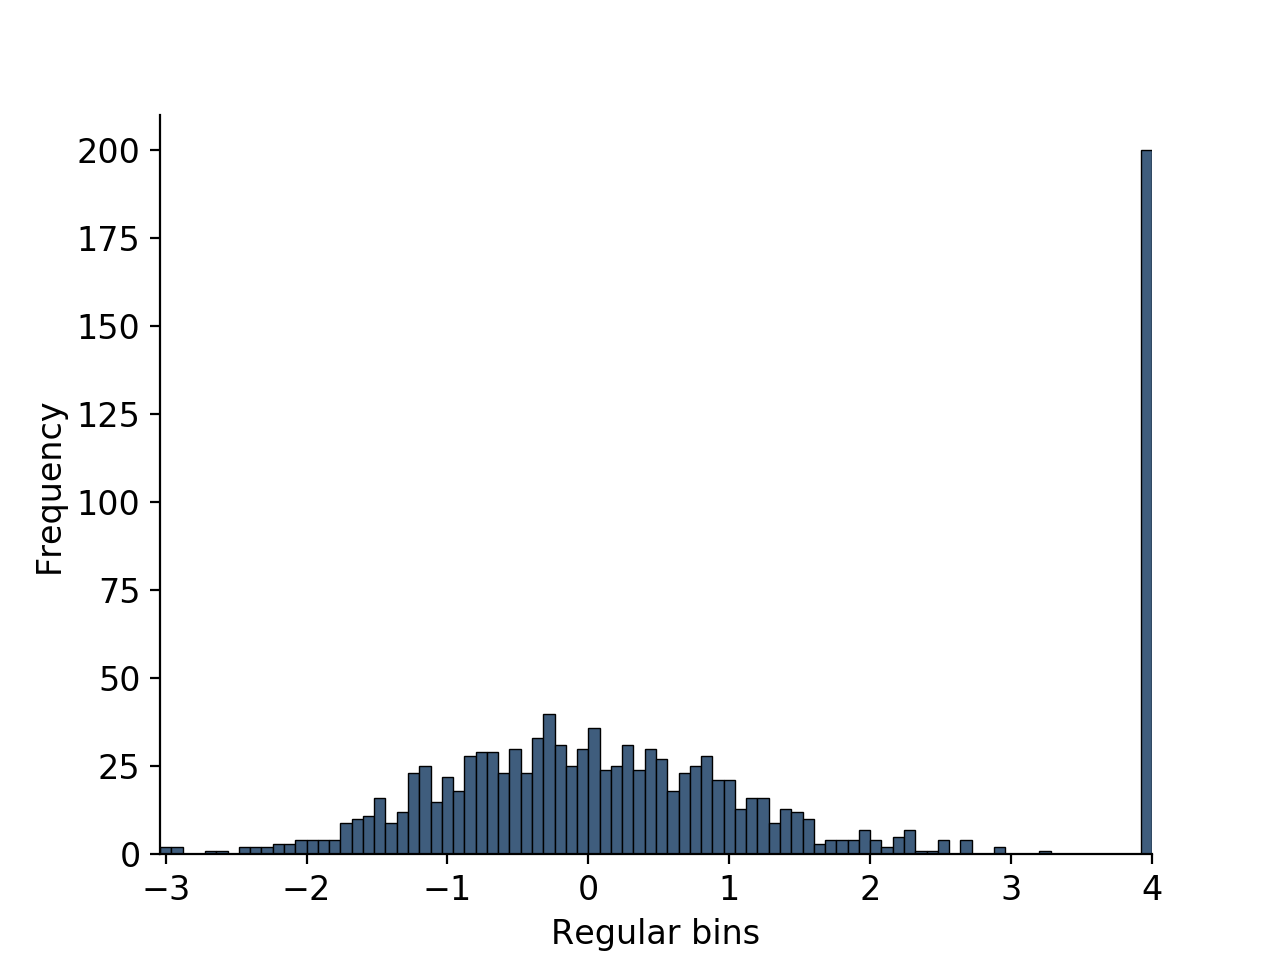

In [26]:
plt.figure()
H1.plot()

## Histogram with irregular bins

In [27]:
x = np.cumsum(np.arange(10))
irregularBins = np.hstack([-x[::-1], x[1:]])

In [28]:
edges = StatArray(irregularBins, 'irregular bins')

In [46]:
H = Histogram1D(bins=edges)

In [47]:
H.binCentres

StatArray([-40.5, -32. , -24.5, -18. , -12.5,  -8. ,  -4.5,  -2. ,  -0.5,
             0.5,   2. ,   4.5,   8. ,  12.5,  18. ,  24.5,  32. ,  40.5])

In [48]:
H.bins

StatArray([-45, -36, -28, -21, -15, -10,  -6,  -3,  -1,   0,   1,   3,
             6,  10,  15,  21,  28,  36,  45])

In [49]:
addThese = (np.random.randn(10000)*20.0) - 10.0

In [50]:
H.update(addThese, trim=True)

<IPython.core.display.Javascript object>


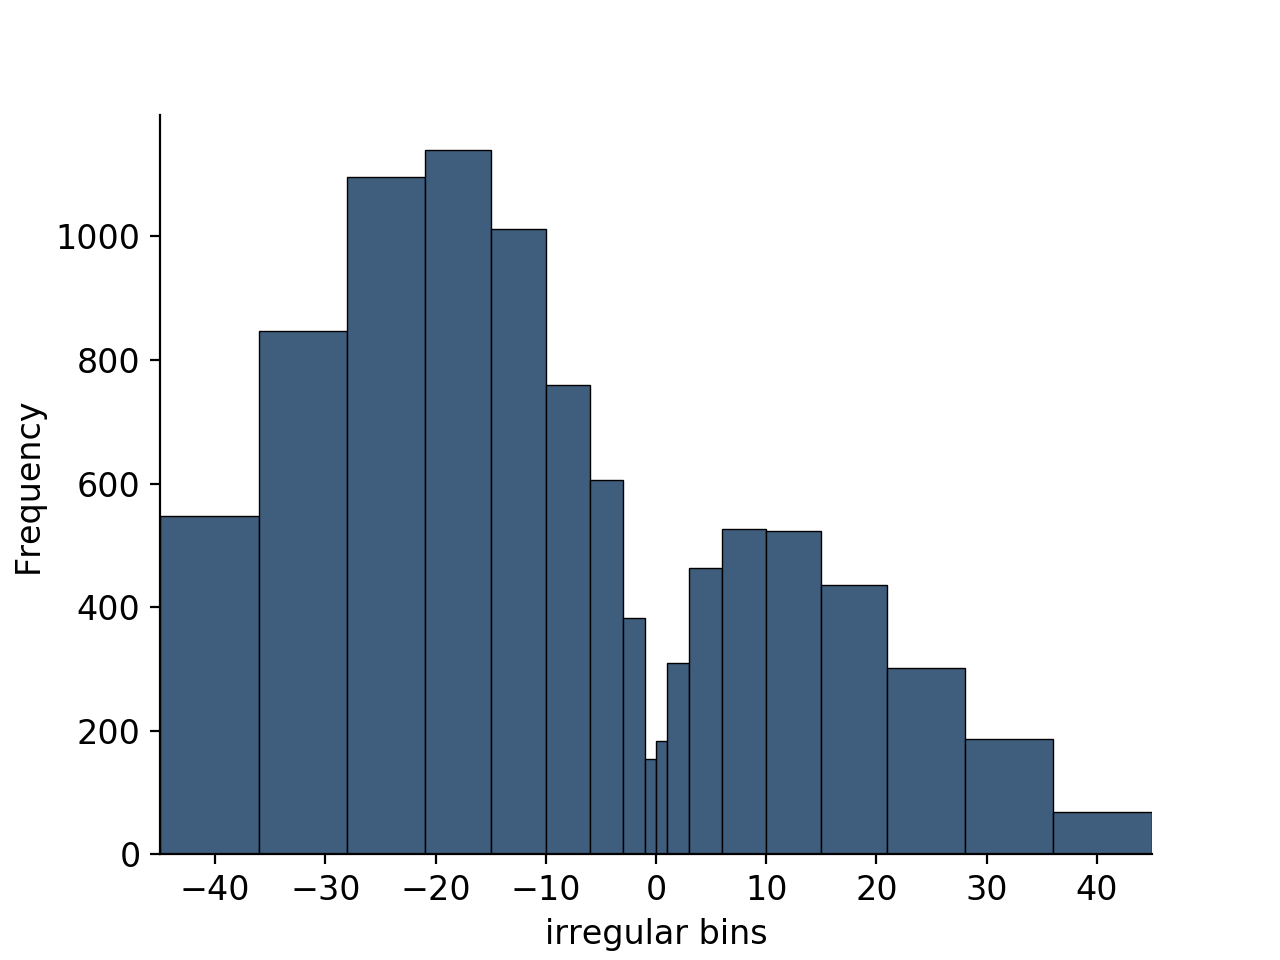

In [51]:
plt.figure()
H.plot()

<IPython.core.display.Javascript object>


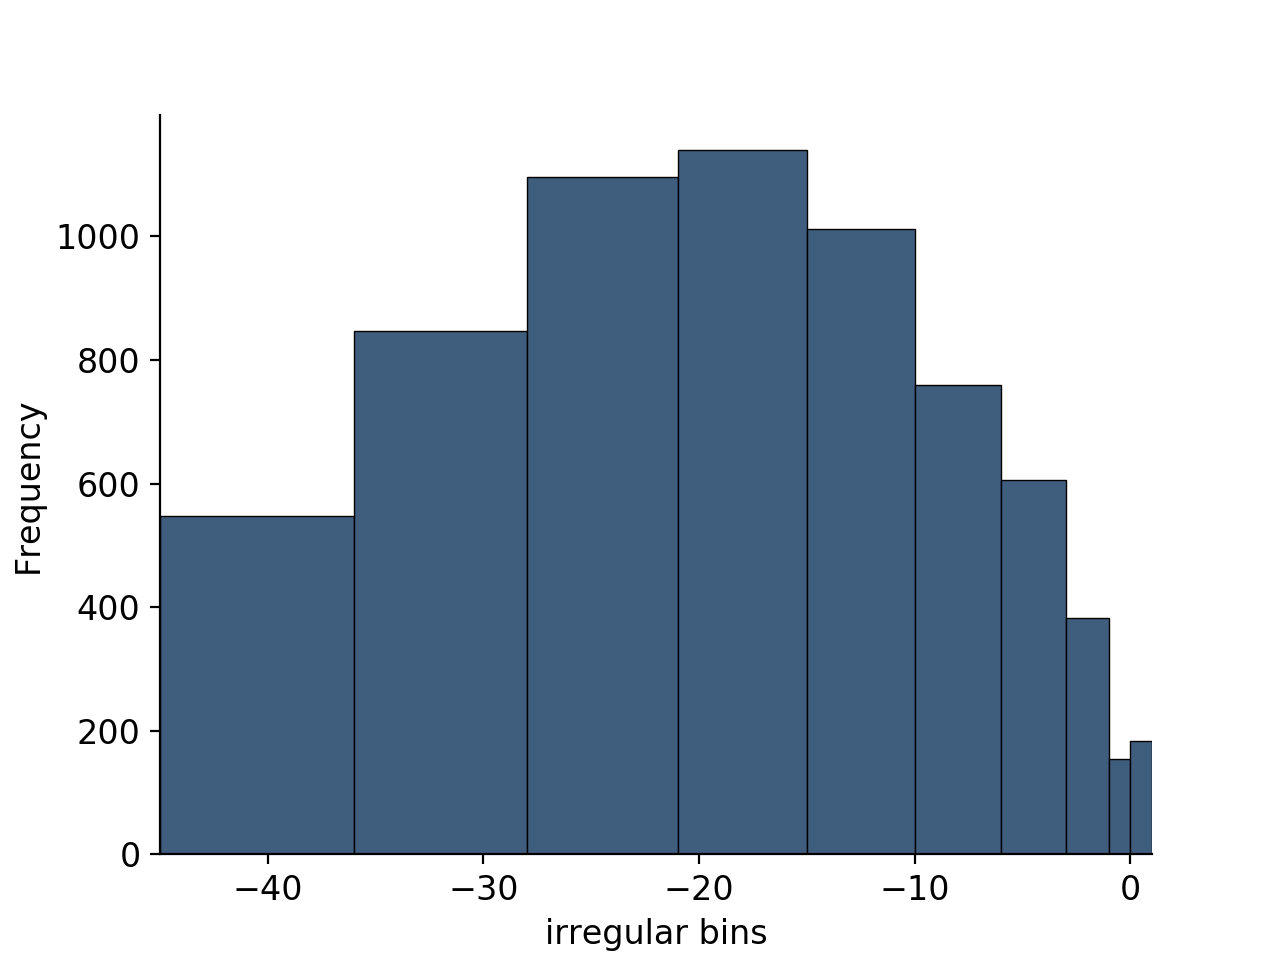

18
slice(None, 10, None)
10


In [61]:
plt.figure()
H[:10].plot()

<IPython.core.display.Javascript object>


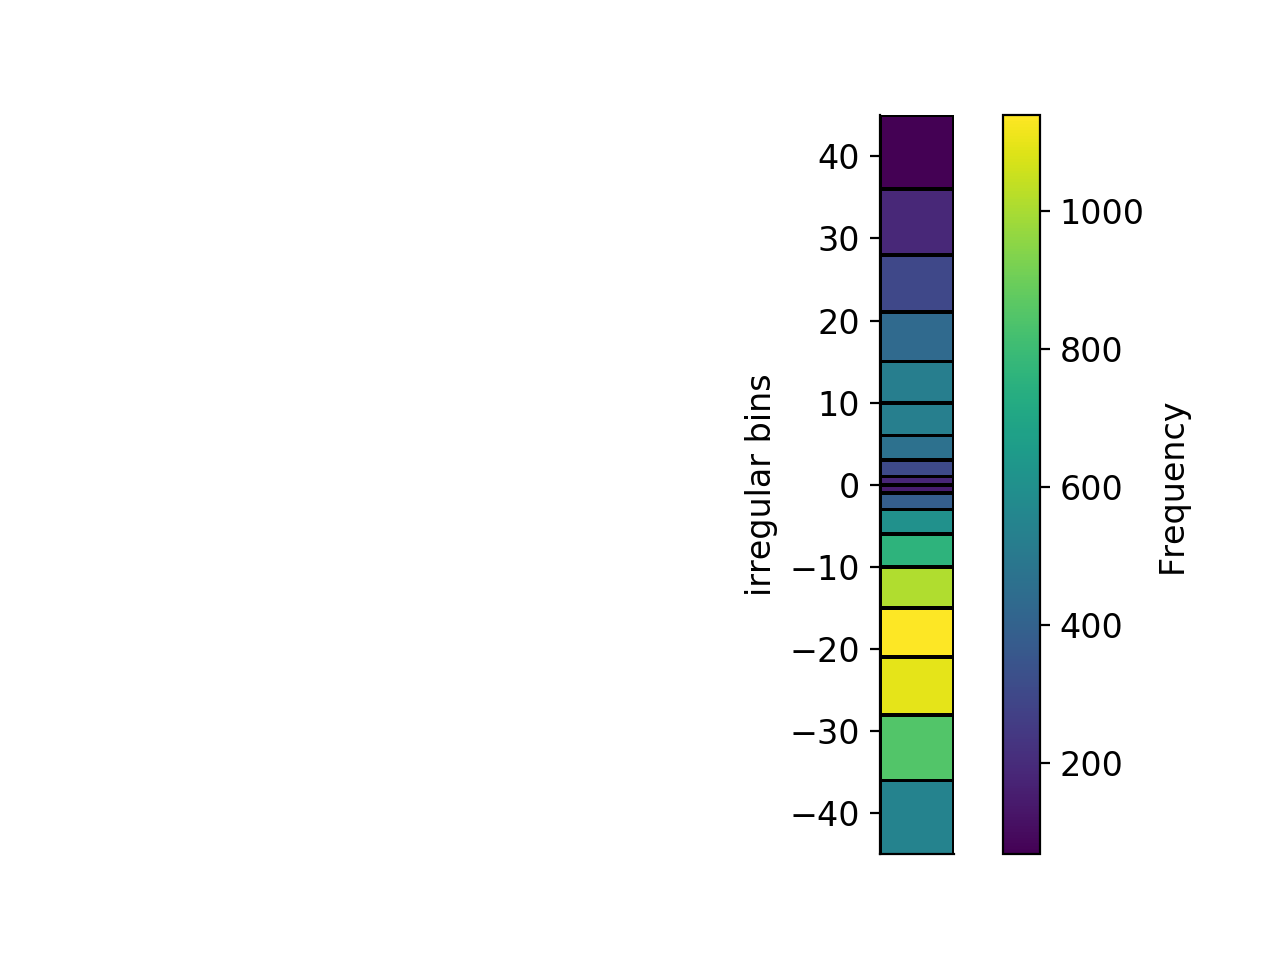

In [52]:
plt.figure()
H.pcolor(grid=True)

## Histogram with linear space entries that are logged internally

In [62]:
positiveBins = StatArray(np.logspace(-5, 3), 'positive bins')

In [75]:
positiveBins.size

50

In [71]:
H = Histogram1D(bins=positiveBins, log='e')

#### Generate random 10**x

In [72]:
addThese = 10.0**(np.random.randn(1000)*2.0)

In [73]:
H.update(addThese, trim=True)

<IPython.core.display.Javascript object>


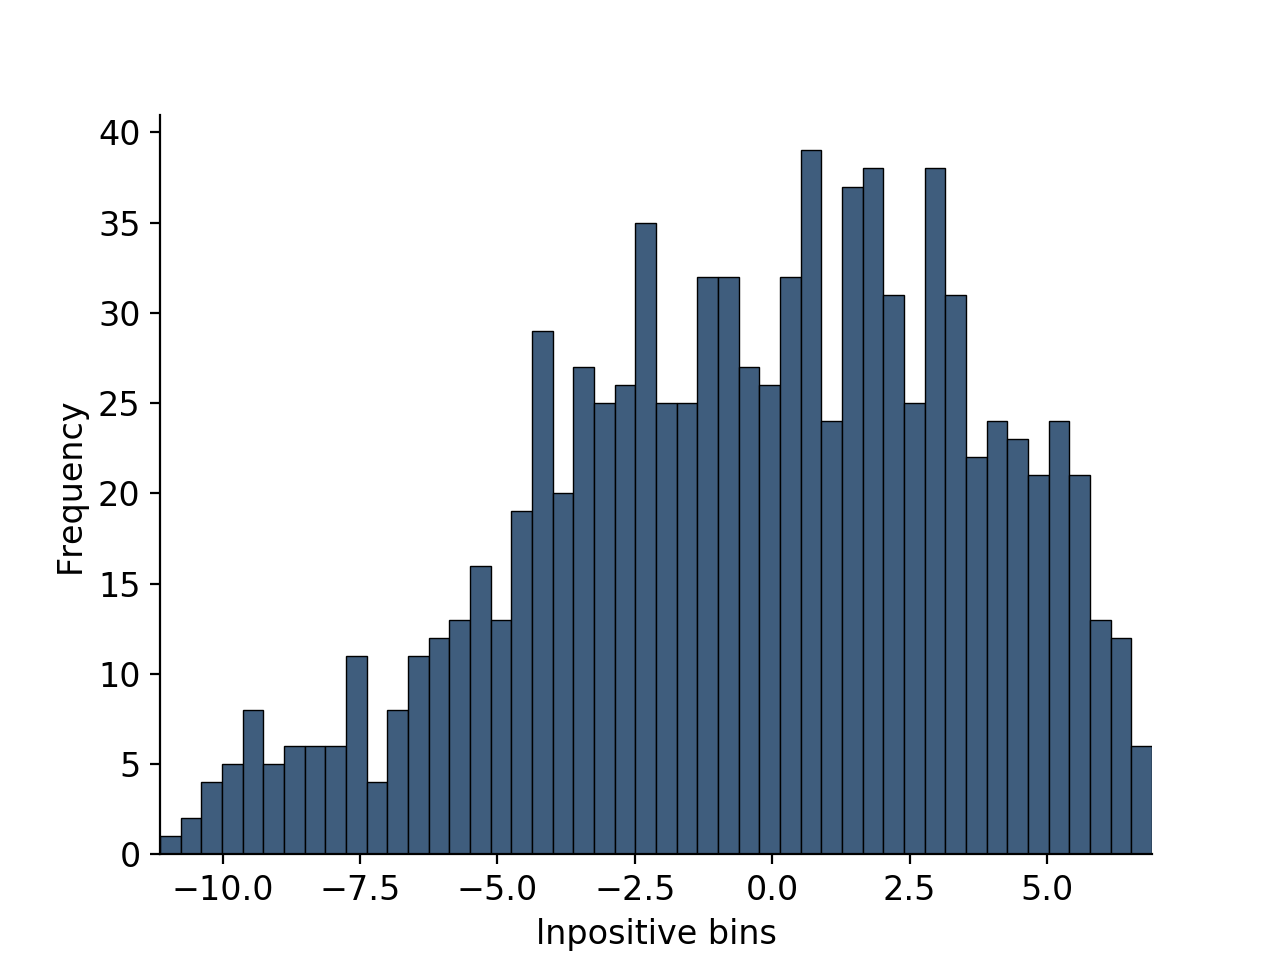

In [74]:
plt.figure()
H.plot()

<IPython.core.display.Javascript object>


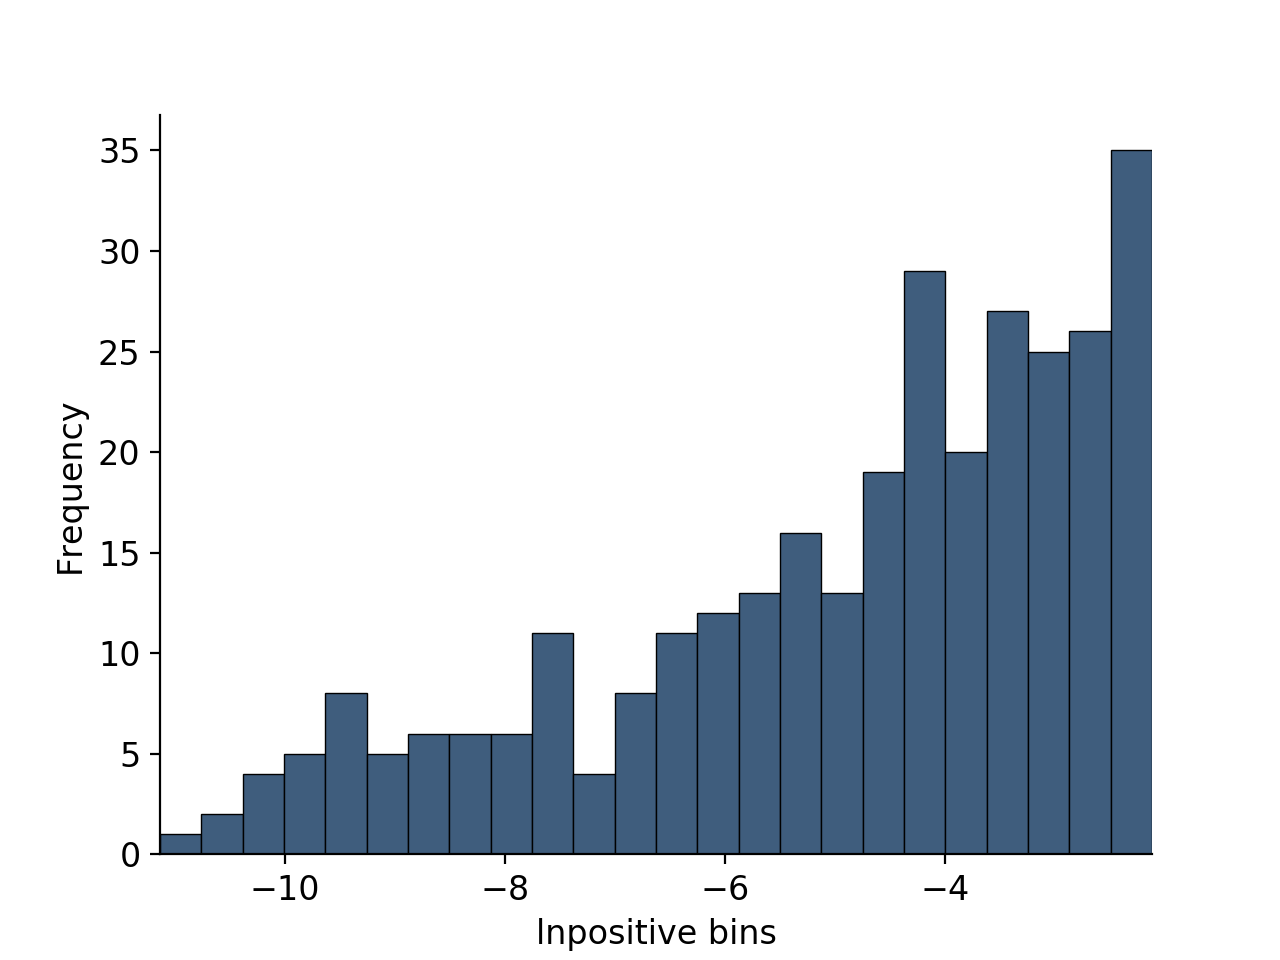

In [89]:
plt.figure()
H[:25].plot()

<IPython.core.display.Javascript object>


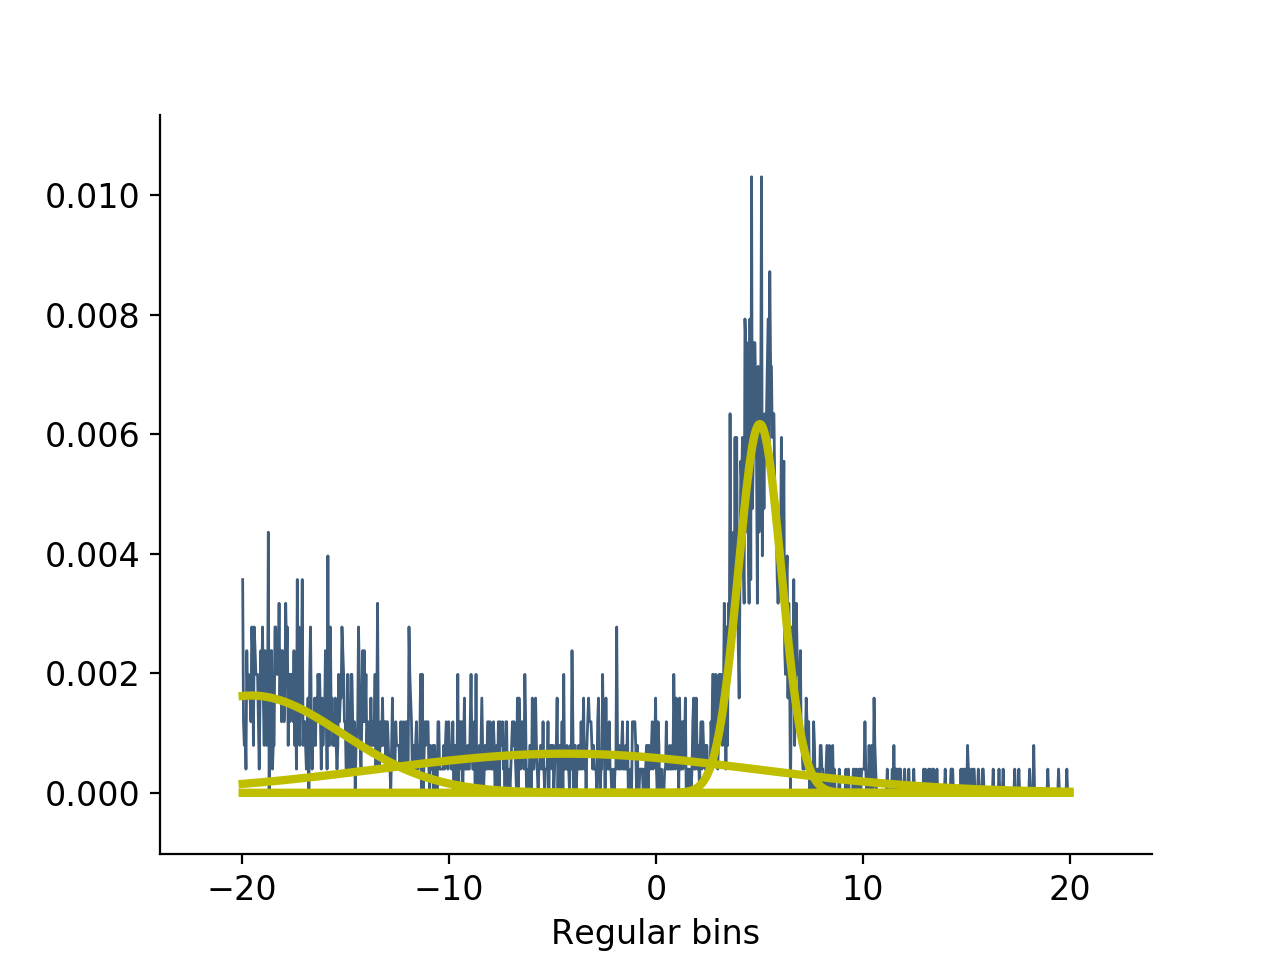

Normal Distribution: 
    Mean: :-19.556008611428428
Variance: :4.401348250214378

Normal Distribution: 
    Mean: :5.018079489059397
Variance: :1.0340367719503731

Normal Distribution: 
    Mean: :-4.34864227832385
Variance: :9.081381385548324



In [2]:
x = (np.random.randn(1000)) + 5
y = (10*np.random.randn(1000)) - 5
z = (4*np.random.randn(1000)) - 19
bins = StatArray(np.linspace(-20, 20, 1001), 'Regular bins')

H = Histogram1D(bins = bins)
H.update(x, trim=True)
H.update(y, trim=True)
H.update(z, trim=True)

g, amp = H.fit_gaussians(3)
plt.figure()
H.estimatePdf().plot(H.binCentres, linewidth=1)
for i in range(len(g)):
    (amp[i] * g[i].probability(H.binCentres)).plot(x=H.binCentres, linewidth=3, c='y')
    g[i].summary()

In [7]:
gaussians, amp, solns, fit = H.findBestNumberOfGaussians(maxDistributions=3)

In [8]:
solns

[array([ 5.02171618e+00,  1.57274321e-02,  1.02372678e+00, -2.12140804e+01,
         3.06230046e-02,  6.49572559e+00, -9.80000000e-01,  1.11168626e-02,
         7.17548416e+00])]

<IPython.core.display.Javascript object>


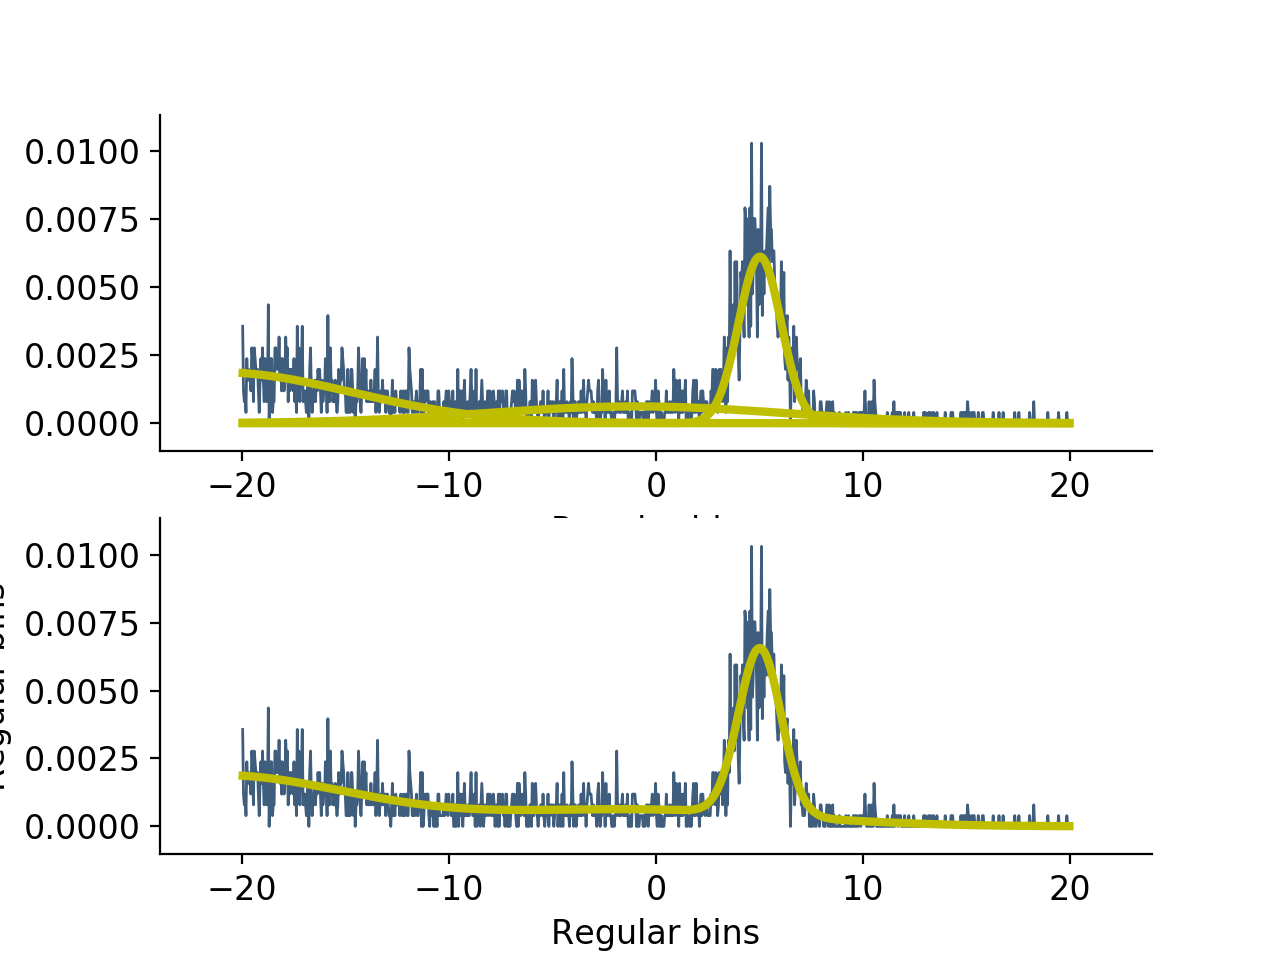

In [5]:
plt.figure()
plt.subplot(211)
H.estimatePdf().plot(H.binCentres, linewidth=1)
for i in range(len(gaussians)):
    (amp[i] * gaussians[i].probability(H.binCentres)).plot(x=H.binCentres, linewidth=3, c='y')
plt.subplot(212)
H.estimatePdf().plot(H.binCentres, linewidth=1)
H._sum_of_gaussians(H.binCentres, *solns[0]).plot(x=H.binCentres, linewidth=3, c='y')

In [6]:
solns

[array([ 5.02171618e+00,  1.57274321e-02,  1.02372678e+00, -2.12140804e+01,
         3.06230046e-02,  6.49572559e+00, -9.80000000e-01,  1.11168626e-02,
         7.17548416e+00])]

In [61]:
fit

array([0.06693257, 0.06693257, 0.06693257])

<IPython.core.display.Javascript object>


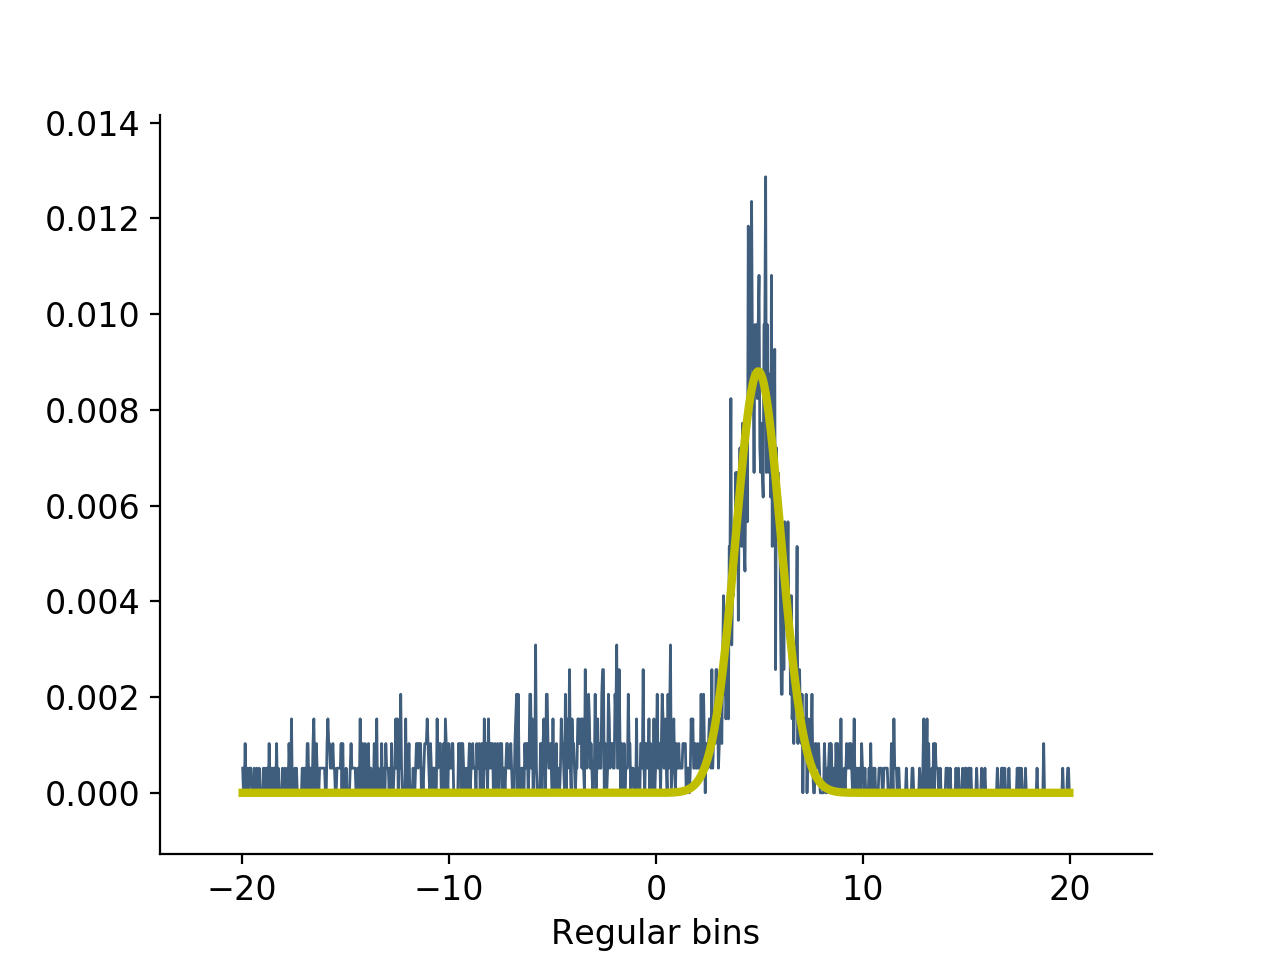

Normal Distribution: 
    Mean: :4.945488378851546
Variance: :1.0933914333649957



In [60]:
plt.figure()
H.estimatePdf().plot(H.binCentres, linewidth=1)
for i in range(len(g)):
    (amp[i] * g[i].probability(H.binCentres)).plot(x=H.binCentres, linewidth=3, c='y')
    g[i].summary()

Fit:
      Means   [-4.72197312]
      Stds    [46.27006377]
      Weights [1.]



<IPython.core.display.Javascript object>


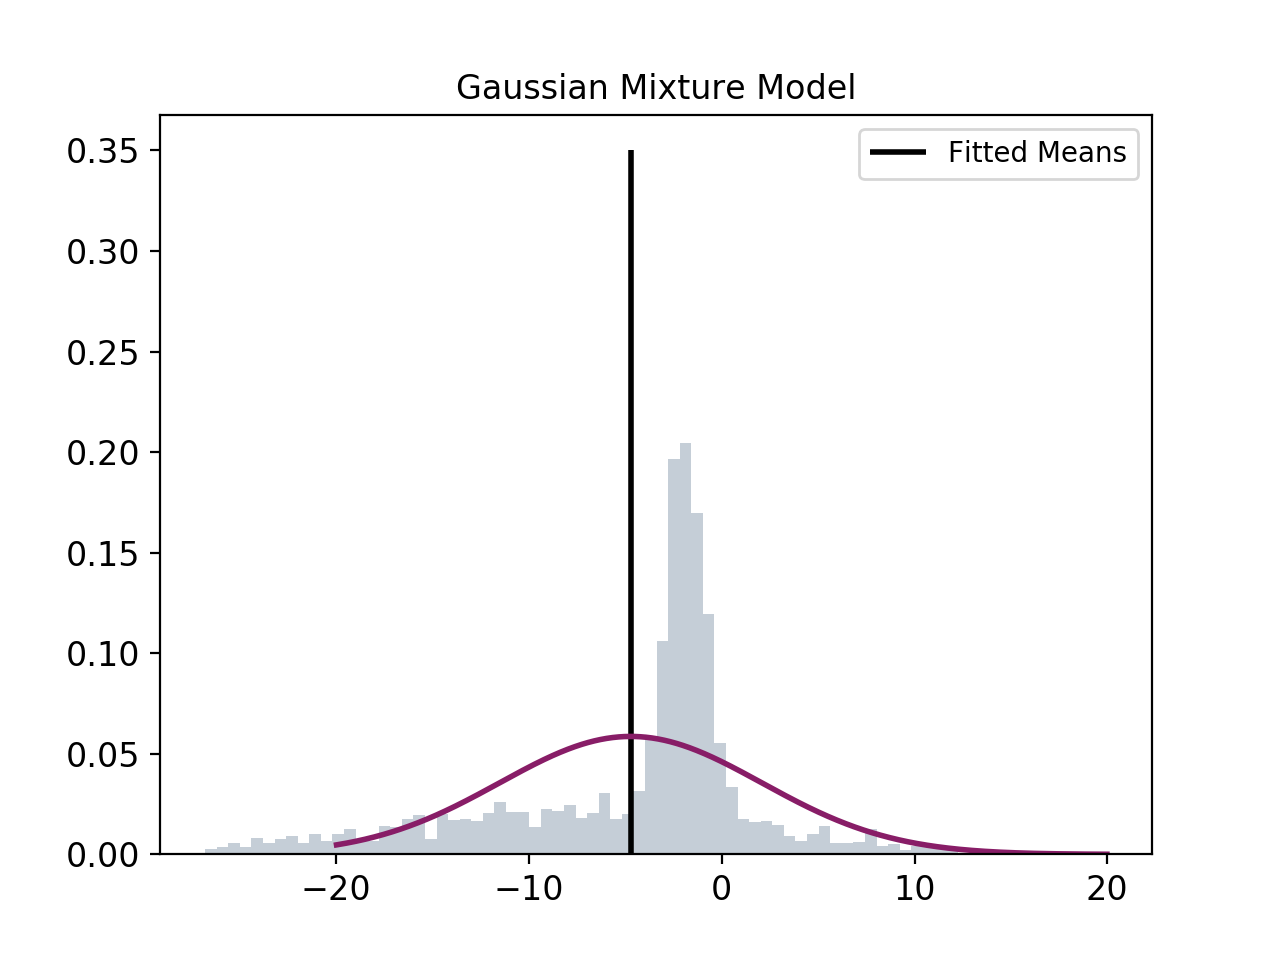

0.9929459171187337


In [113]:
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

samples = H.sample(10000).reshape(-1, 1)
samples -= np.std(samples)

n_components=1
gmm = GaussianMixture(n_components, covariance_type='spherical')#, means_init=np.asarray([5.0, 0.0]).reshape(-1, 1))
gmm.fit(samples)

print(
    '''Fit:
      Means   {}
      Stds    {}
      Weights {}
'''.format(gmm.means_[:, 0], gmm.covariances_, gmm.weights_)
)

plt.figure()
plt.hist(samples, bins='auto', alpha=.3, density=True)
plt.vlines(gmm.means_[:, 0], ymin=0, ymax=0.35, label='Fitted Means')
for i in range(n_components):
    fittedPdf = gmm.weights_[i]*norm.pdf(H.binCentres, gmm.means_[i, 0], np.sqrt(gmm.covariances_[i]))
    plt.plot(H.binCentres, fittedPdf)
plt.legend()
plt.title('Gaussian Mixture Model')

print(np.linalg.norm(H.estimatePdf() - fittedPdf))